In [20]:
import seaborn as sns
import matplotlib.transforms as transforms
from datetime import datetime
from skimage.io import imsave
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
#%plt.style.use("v_paper")
import pandas as pd
import deepdish as dd
from scipy.io import loadmat
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import re
from statsmodels.stats.anova import anova_lm
import os
import os.path
import statsmodels.api as smapi
import sys
import warnings
from sklearn.linear_model import LinearRegression
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import seaborn as sns
import qgrid
import statsmodels as sm
import scipy
from pathlib import Path
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms

In [21]:
GoodICFiles=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\GoodICsdf.pkl")

In [22]:
Compdf=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Compdf.pkl")

In [23]:
Compdf=Compdf.query('CompID!=" "')
Compdf=Compdf.query('CompID!=""')

In [24]:
Compdf=Compdf.groupby('CompID').filter(lambda x : len(x)>4)

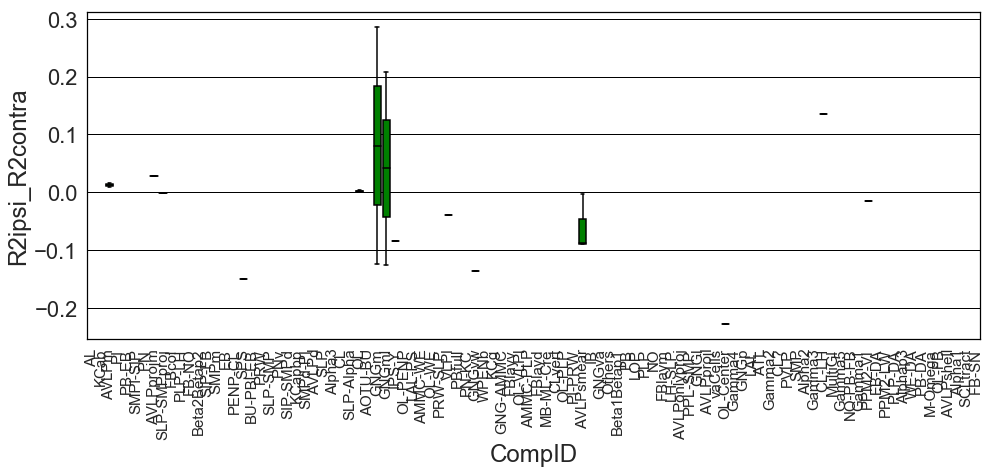

In [25]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df=Compdf
df3=df[['R2ipsi_R2contra','CompID']]
b = sns.boxplot(x='CompID',y='R2ipsi_R2contra',data=df3,color='g')
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)

plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2Turnipsimcontrared.svg')
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2Turnipsimcontrared.png')
    
plt.show()

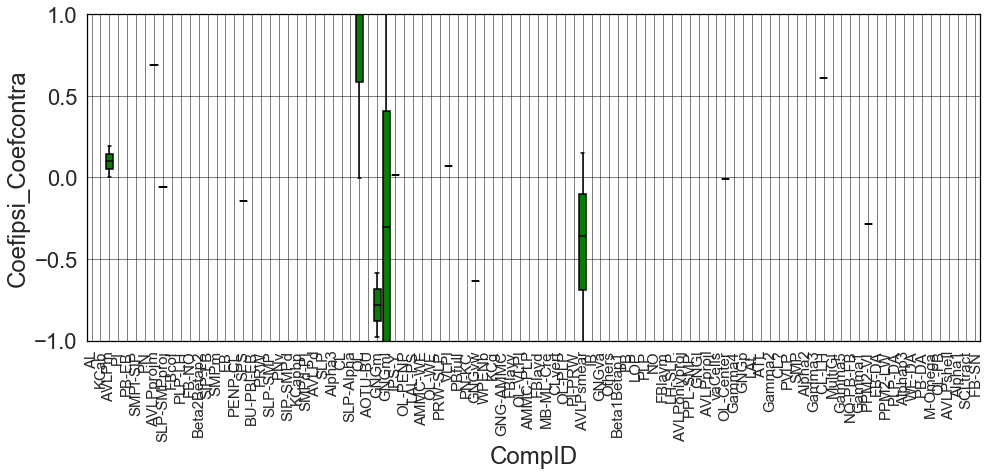

In [26]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df=Compdf
df3=df[['Coefipsi_Coefcontra','CompID']]

b = sns.boxplot(x='CompID',y='Coefipsi_Coefcontra',data=df3,color='g')
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.ylim([-1,1])
plt.grid(True,alpha=0.5)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefTurnipsimcontrared.svg')
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\CoefTurnipsimcontrared.png')
    
plt.show()

In [27]:
CompOrder=pd.read_csv('Z:\GrunwaldKadow_group\Sophie\WalkProject\AllCompIDOrderedVF.txt',header=None,keep_default_na=False)
Compdf=Compdf[Compdf.CompID.isin(list(CompOrder[0]))]

In [28]:
CompIDList=list(CompOrder[0])
CompOrder2=[CompIDList[i] for i in range(len(CompOrder)) if (CompIDList[i] in Compdf['CompID'].unique())]

In [29]:
lin_reg = smf.ols(formula="R2ipsi_R2contra ~ CompID+UAS", data=Compdf).fit()

In [30]:
L= np.argsort(CompOrder2)
L2=np.argsort(L) 

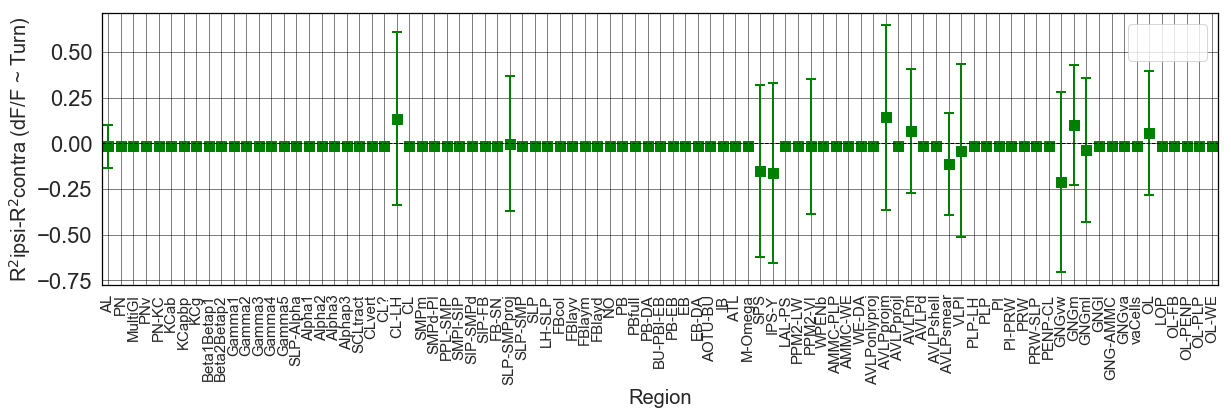

In [31]:
lin_reg = smf.ols(formula="R2ipsi_R2contra ~ CompID+UAS", data=Compdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = (lin_reg.params[range(len(L))])[L2.astype(int)] - (lin_reg.conf_int(alpha=0.05)[0][range(len(L))])[L2.astype(int)]

err_seriesgsum=[(a+lin_reg.params[0]) for a in err_series]

coef_series=(lin_reg.params.values[range(len(L))])[L2.astype(int)]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum),
                        'varname': err_series.index.values
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')


plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ipsi-R$^2$contra (dF/F ~ Turn)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(CompOrder2, 
                       rotation=90, fontsize=15)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.grid(True,alpha=0.5)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure5\R2TurnwithCompIDReg.svg')

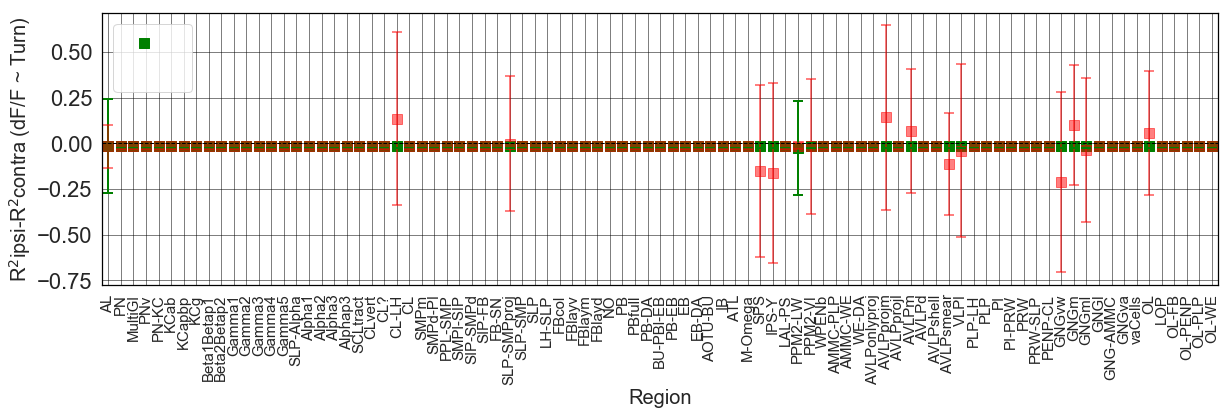

In [32]:
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20   

lin_reg = smf.ols(formula="R2fForcedIpsi_contra ~ CompID+UAS", data=Compdf).fit()
 
err_series = (lin_reg.params[range(len(L))])[L2.astype(int)] - (lin_reg.conf_int(alpha=0.05)[0][range(len(L))])[L2.astype(int)]

err_seriesgsum=[(a+lin_reg.params[0]) for a in err_series]

coef_series=(lin_reg.params.values[range(len(L))])[L2.astype(int)]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum),
                        'varname': err_series.index.values
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")


lin_reg = smf.ols(formula="R2ipsi_R2contra ~ CompID+UAS", data=Compdf).fit()
 
err_series = (lin_reg.params[range(len(L))])[L2.astype(int)] - (lin_reg.conf_int(alpha=0.05)[0][range(len(L))])[L2.astype(int)]

err_seriesgsum=[(a+lin_reg.params[0]) for a in err_series]

coef_series=(lin_reg.params.values[range(len(L))])[L2.astype(int)]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum),
                        'varname': err_series.index.values
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='r', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), alpha=0.5,
          y=coef_df['coef'], color='r',label="Mixed model for fly ID")


plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ipsi-R$^2$contra (dF/F ~ Turn)',fontsize=20)


plt.grid(b=None)
_ = ax.set_xticklabels(CompOrder2, 
                       rotation=90, fontsize=15)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.grid(True,alpha=0.5)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\Fig7R2TurnwithCompIDReg.svg')

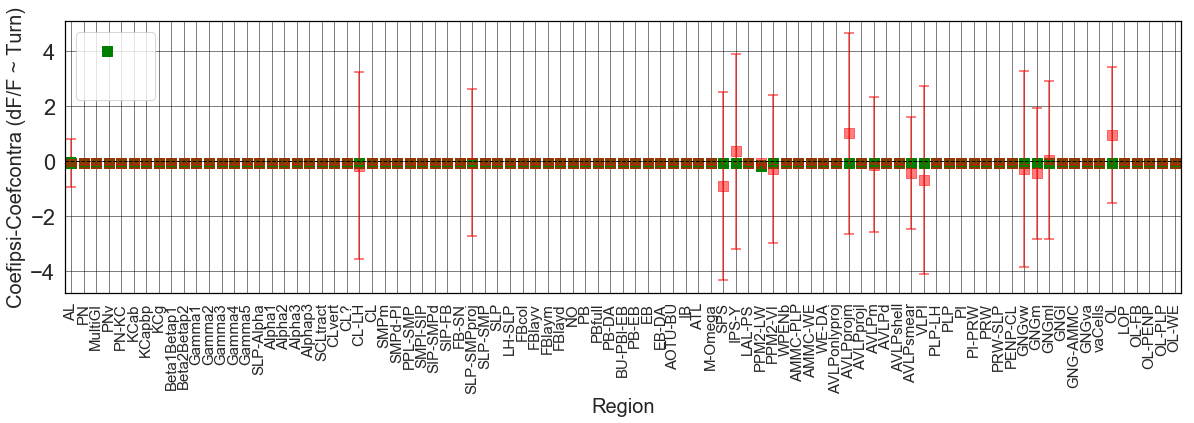

In [33]:
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20   

lin_reg = smf.ols(formula="CoeffForcedIpsi_contra ~ CompID+UAS", data=Compdf).fit()
 
err_series = (lin_reg.params[range(len(L))])[L2.astype(int)] - (lin_reg.conf_int(alpha=0.05)[0][range(len(L))])[L2.astype(int)]

err_seriesgsum=[(a+lin_reg.params[0]) for a in err_series]

coef_series=(lin_reg.params.values[range(len(L))])[L2.astype(int)]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum),
                        'varname': err_series.index.values
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")


lin_reg = smf.ols(formula="Coefipsi_Coefcontra ~ CompID+UAS", data=Compdf).fit()
 
err_series = (lin_reg.params[range(len(L))])[L2.astype(int)] - (lin_reg.conf_int(alpha=0.05)[0][range(len(L))])[L2.astype(int)]

err_seriesgsum=[(a+lin_reg.params[0]) for a in err_series]

coef_series=(lin_reg.params.values[range(len(L))])[L2.astype(int)]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum),
                        'varname': err_series.index.values
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='r', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), alpha=0.5,
          y=coef_df['coef'], color='r',label="Mixed model for fly ID")


plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefipsi-Coefcontra (dF/F ~ Turn)',fontsize=20)


plt.grid(b=None)
_ = ax.set_xticklabels(CompOrder2, 
                       rotation=90, fontsize=15)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.grid(True,alpha=0.5)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\Fig7CoefTurnwithCompIDReg.svg')

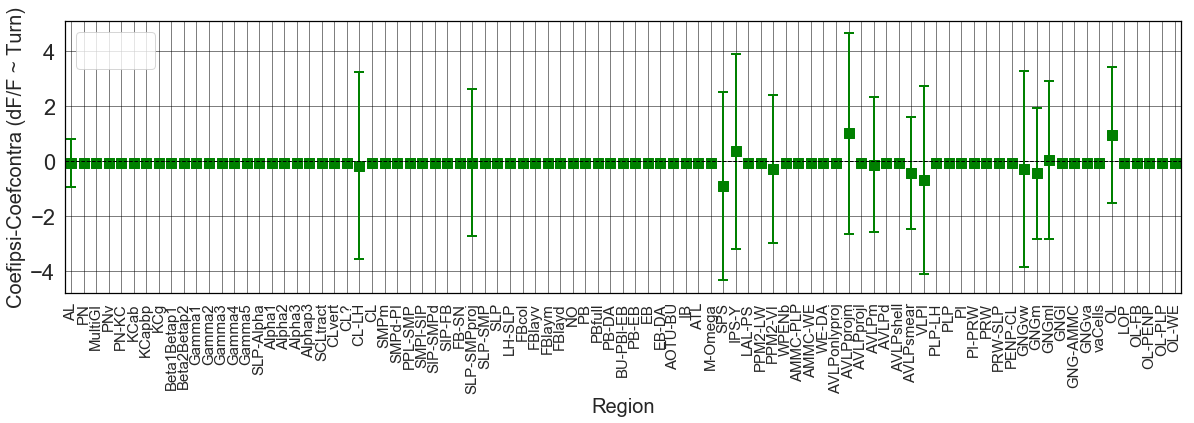

In [34]:
lin_reg = smf.ols(formula="Coefipsi_Coefcontra ~ CompID+UAS", data=Compdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = (lin_reg.params[range(len(L))])[L2.astype(int)] - (lin_reg.conf_int(alpha=0.05)[0][range(len(L))])[L2.astype(int)]

err_seriesgsum=[(a+lin_reg.params[0]) for a in err_series]

coef_series=(lin_reg.params.values[range(len(L))])[L2.astype(int)]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum),
                        'varname': err_series.index.values
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')


plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefipsi-Coefcontra (dF/F ~ Turn)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(CompOrder2, 
                       rotation=90, fontsize=15)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.grid(True,alpha=0.5)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\CoefTurnwithCompIDReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

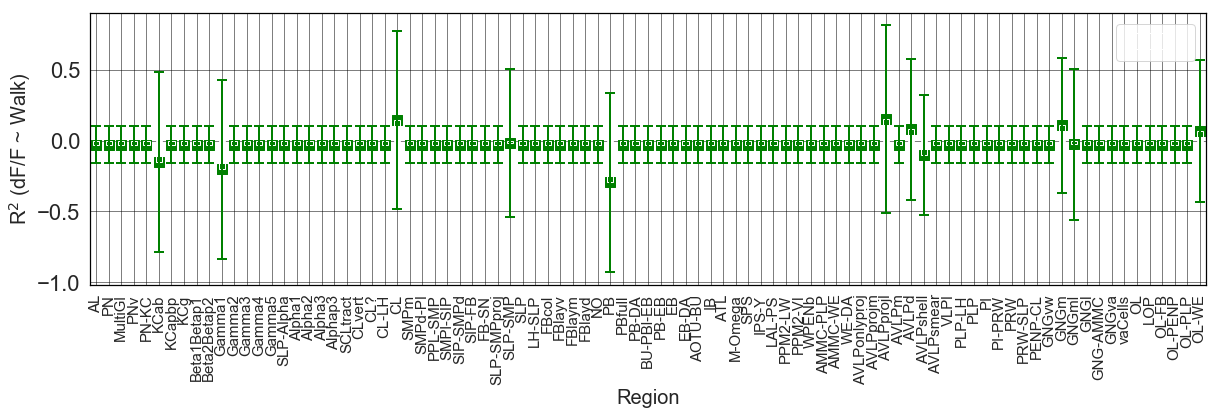

In [35]:
lin_reg = smf.ols(formula="R2ipsi_R2contra ~ CompID+UAS", data=df).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[L2+1]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)+1],
                        'varname': err_series.index.values[L2+1]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')


plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(CompOrder2, 
                       rotation=90, fontsize=15)
ax.grid(True,alpha=0.5)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure5\R2TurnwithCompIDReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

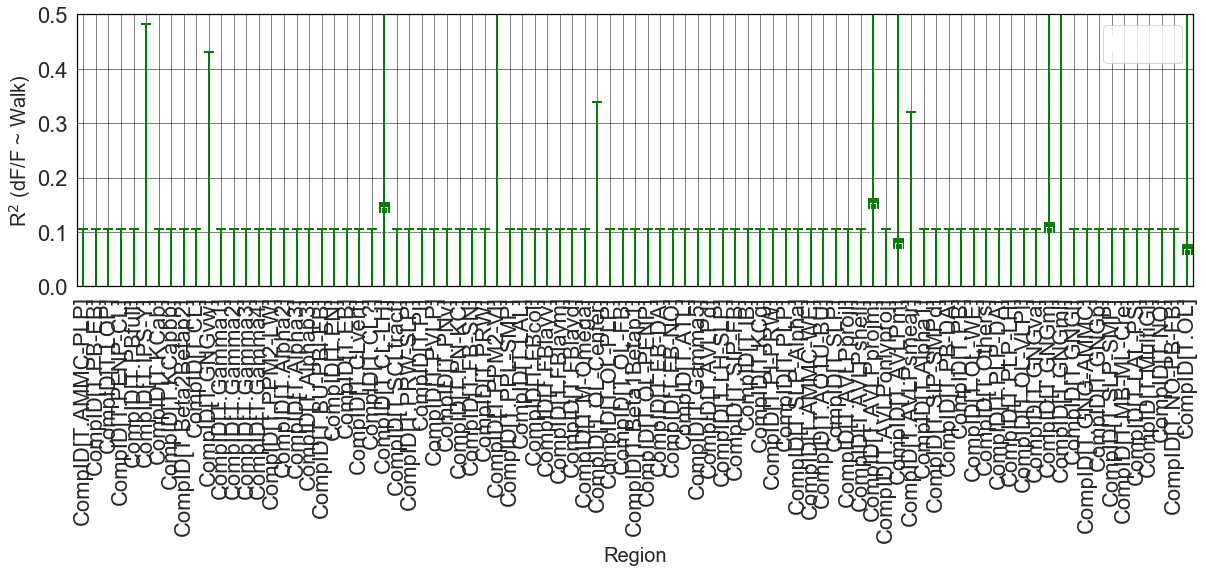

In [36]:
lin_reg = smf.ols(formula="R2ipsi_R2contra ~ CompID+UAS", data=df).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[L2+1]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)+1],
                        'varname': err_series.index.values[L2+1]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')


plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
#_ = ax.set_xticklabels(list(CompOrder[0]), 
#                       rotation=90, fontsize=15)
ax.grid(True,alpha=0.5)
plt.ylim([0,0.5])
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure5\R2TurnwithCompIDReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

In [37]:
df=Compdf.query('GAL4=="Nsyb" or GAL4=="GMR5710" ')

df2=df[['R2ipsi_R2contra','CompID','expID']]
df2=df2.dropna()
df2=df2.query('CompID!=" "')
df2=df2.query('CompID!=""')
pval=np.zeros(len(df.CompID.unique()))
df=df2
df=df.groupby('CompID').filter(lambda x : len(x)>4)

i=0
for compid in df.CompID.unique():
    df2=df.loc[df['CompID']==compid]
    pval[i]=scipy.stats.wilcoxon(df2['R2ipsi_R2contra']).pvalue
    i=i+1
    
pvalcorr=sm.stats.multitest.multipletests(pval, alpha=0.05, method='hs', is_sorted=False, returnsorted=False)

i=0
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2WalkTurnPANpvalsipsimincontratozero.txt', 'w') as f:
    for compid in df.CompID.unique():
        f.write(compid)
        f.write(':') 
        f.write(str(pvalcorr[1][i]))        
        f.write('\n')
        print(compid)
        print(pvalcorr[1][i])
        i=i+1
        



In [38]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df=Compdf
df2=df[['R2ipsi_R2contra','CompID']]
df3=df2.dropna()
df3=df3.query('CompID!=" "')
df3=df3.query('CompID!=""')
df3=df3.groupby('CompID').filter(lambda x : len(x)>4)
b = sns.boxplot(x='CompID',y='R2ipsi_R2contra',data=df3,color='g')
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2TurnipsimcontraredAll.svg')
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2TurnipsimcontraredAll.png')
    
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1152x432 with 0 Axes>

In [ ]:
df=Compdf
df2=df[['R2ipsi_R2contra','CompID','FlyID']]
df2=df2.dropna()
df2=df2.query('CompID!=" "')
df2=df2.query('CompID!=""')

df=df2
df=df.groupby('CompID').filter(lambda x : len(x)>4)


pval=np.zeros(len(df.CompID.unique()))

i=0
for compid in df.CompID.unique():
    df2=df.loc[df['CompID']==compid]
    pval[i]=scipy.stats.wilcoxon(df2['R2ipsi_R2contra']).pvalue
    i=i+1
    
pvalcorr=sm.stats.multitest.multipletests(pval, alpha=0.05, method='hs', is_sorted=False, returnsorted=False)

i=0
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2WalkTurnAllpvalsipsimcontra.txt', 'w') as f:
    for compid in df.CompID.unique():
        f.write(compid)
        f.write(':') 
        f.write(str(pvalcorr[1][i]))        
        f.write('\n')
        print(compid)
        print(pvalcorr[1][i])
        i=i+1
        
        


In [ ]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df=Compdf.query('GAL4=="TH" or GAL4=="TDC" or GAL4=="Trh"')
df2=df[['R2Turn_contra','CompID']]
df3=df2.dropna()
df3=df3.query('CompID!=" "')
df3=df3.query('CompID!=""')
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)
b = sns.boxplot(x='CompID',y='R2Turn_contra',data=df3,color='g')
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2TurnipsimcontraredAmines.svg')
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure4\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [ ]:
df=Compdf.query('GAL4=="TH" or GAL4=="TDC" or GAL4=="Trh"')
df2=df[['Coefipsi_Coefcontra','CompID']]
df2=df2.dropna()
df2=df2.query('CompID!=" "')
df2=df2.query('CompID!=""')
df2=df2.groupby('CompID').filter(lambda x : len(x)>3)
L=len(df2.CompID.unique())
df=df2
pval=np.zeros(len(df.CompID.unique()))
i=0
for compid in df.CompID.unique():
    df2=df.loc[df['CompID']==compid]
    pval[i]=scipy.stats.wilcoxon(df2['Coefipsi_Coefcontra']).pvalue
    i=i+1
    
pvalcorr=sm.stats.multitest.multipletests(pval, alpha=0.05, method='hs', is_sorted=False, returnsorted=False)

i=0
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\CoefWalkTurnBroadpvalsipsimincontratozero.txt', 'w') as f:
    for compid in df.CompID.unique():
        f.write(compid)
        f.write(':') 
        f.write(str(pvalcorr[1][i]))        
        f.write('\n')
        print(compid)
        print(pvalcorr[1][i])
        i=i+1
        


In [ ]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df=Compdf.query('GAL4=="Nsyb" or GAL4=="GMR5710" or GAL4=="Cha" or GAL4=="Gad"or GAL4=="Vglut"')
df.loc[df['expID']=='981']['R2ipsi_R2contra']=-df.loc[df['expID']=='981']['R2ipsi_R2contra']
df2=df[['R2ipsi_R2contra','CompID']]
df3=df2.dropna()
df3=df3.query('CompID!=" "')
df3=df3.query('CompID!=""')
df3=df3.groupby('CompID').filter(lambda x : len(x)>4)
b = sns.scatterplot(x='CompID',y='R2ipsi_R2contra',data=df3,color='g',s=100)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\R2TurnipsimcontraredBroad.svg')
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\R2TurnipsimcontraredBroad.png')
    
plt.show()

In [ ]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df=Compdf.query('GAL4=="TH" or GAL4=="TDC" or GAL4=="Trh"')
df2=df[['Coefipsi_Coefcontra','CompID']]
df3=df2.dropna()
df3=df3.query('CompID!=" "')
df3=df3.query('CompID!=""')
df3=df3.groupby('CompID').filter(lambda x : len(x)>4)
b = sns.scatterplot(x='CompID',y='Coefipsi_Coefcontra',data=df3,color='g',s=100)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


#plt.yticks([0,0.5])  
plt.ylim([-5,5])
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\R2Turnipsigreen_contraredAmines.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure3\R2Turnipsigreen_contraredAmines.png')
    
plt.show()